In [1]:
from psg import PSG
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ecg import ECG
from emg import EMG
from eeg import EEG

In [2]:
# Create PSG objects for each individual's PSG to analayze
psgN3 = PSG("n3")

Extracting EDF parameters from c:\Users\andre\OneDrive\Desktop\CS4641\Project\PSG_Project\psg_project\n3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


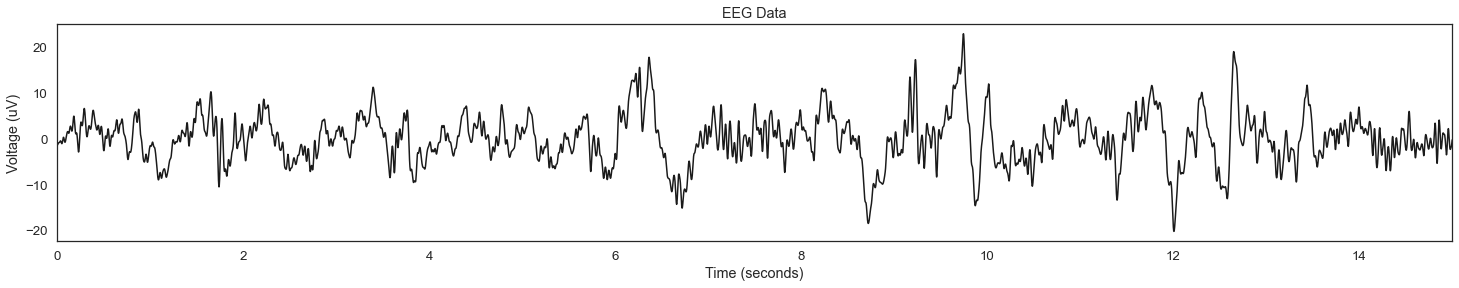

In [396]:
# Example of reading EEG Data with epoch range
EEG_N3 = EEG(psgN3.data)
vector = EEG_N3.get_eeg_vector_epoch_range(240, 251, 'F4-C4')
vector_clean = EEG_N3.preprocess(vector)
EEG_N3.plot_eeg(vector_clean[0:500*15])

Beta Relative power: 0.083
Alpha Relative power: 0.070
Theta Relative power: 0.219
Delta Relative power: 0.608


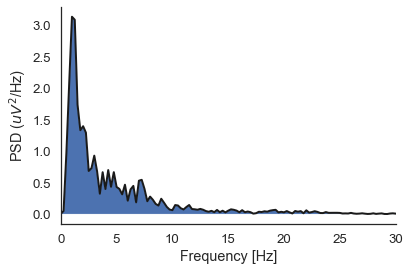

In [397]:
# Example of Welch PSD Plot & Relative Power Feature
vector = EEG_N3.get_eeg_vector_epoch(900, 'F4-C4')
vector_clean = EEG_N3.preprocess(vector)
EEG_N3.plot_welch_psd(vector_clean)
EEG_N3.relative_psd_power(vector_clean)

In [3]:
# Create ECG object:
ecgDfInput = psgN3.data.loc[400000:600000, ["epoch", "ECG1-ECG2"]]
ecgN3 = ECG(ecgDfInput)

c:\Users\andre\OneDrive\Desktop\CS4641\Project\PSG_Project\PSG_Project_Venv\lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


In [4]:
# Functions for getting raw ECG data:
rawDataEpoch1 = ecgN3.getRawDataByEpoch(26)
display(rawDataEpoch1)

rawDataTime1 = ecgN3.getRawDataByTime(800, 1)
display(rawDataTime1)

# ECG Feature extraction:
metrics1 = ecgN3.getMetrics()
display(metrics1)

,epoch,ECG1-ECG2
400000,26.0,0.000027
400001,26.0,0.000027
400002,26.0,0.000027
400003,26.0,0.000027
400004,26.0,0.000026
...,...,...
414715,26.0,0.000015
414716,26.0,0.000015
414717,26.0,0.000015
414718,26.0,0.000015


,epoch,ECG1-ECG2
409600,26.0,0.000021
409601,26.0,0.000021
409602,26.0,0.000021
409603,26.0,0.000020
409604,26.0,0.000020
...,...,...
410108,26.0,0.000018
410109,26.0,0.000018
410110,26.0,0.000018
410111,26.0,0.000018


,epoch,bpm,bpm_norm,rmssd,rmssd_norm,lf,lf_norm,hf,hf_norm,lf/hf,lf/hf_norm
0,26,59.114496,0.998250,31.889138,0.973683,578.507314,0.811327,298.200327,0.880932,1.939996,0.963630
1,27,59.020897,0.996670,31.960010,0.975847,1015.720939,1.424497,390.008462,1.152148,2.604356,1.293630
2,28,59.139838,0.998678,32.672803,0.997611,1146.735420,1.608238,418.966476,1.237695,2.737058,1.359545
3,29,59.218310,1.000003,33.075033,1.009892,813.262119,1.140559,367.022567,1.084244,2.215837,1.100645
4,30,59.305504,1.001476,33.249049,1.015206,427.664165,0.599777,294.097433,0.868812,1.454158,0.722306
5,31,59.509580,1.004922,33.660267,1.027761,296.339058,0.415601,262.737139,0.776168,1.127892,0.560244


In [3]:
# Create EMG Object:
emgDfInput = psgN3.data.loc[:, ["elapsed_seconds", "epoch", "EMG1-EMG2"]]
emgN3 = EMG(emgDfInput)

In [4]:
# EMG Feature Extraction:
metrics_emg = emgN3.getMetrics()
display(metrics_emg)

,epoch,EMG_epochEnergy,EMG_epochEnergy_norm,EMG_5Highest5Sec,EMG_5Highest5Sec_norm
0,0,4.777495e-06,12.201508,3.431867e-06,8.764836
1,1,2.291293e-07,0.585186,4.646428e-08,0.118668
2,2,2.076511e-07,0.530332,5.028354e-08,0.128422
3,3,2.836140e-07,0.724337,5.078629e-08,0.129706
4,4,2.420611e-07,0.618213,4.686139e-08,0.119682
...,...,...,...,...,...
996,996,5.457533e-06,13.938296,1.821842e-06,4.652903
997,997,6.020462e-06,15.375992,3.169756e-06,8.095416
998,998,3.802387e-06,9.711128,3.239604e-06,8.273804
999,999,9.626694e-06,24.586146,4.869794e-06,12.437238


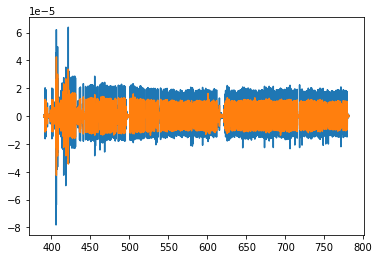

,epoch,EMG_epochEnergy,EMG_epochEnergy_norm,EMG_5Highest5Sec,EMG_5Highest5Sec_norm
0,13,1.381521e-07,2.704877,6.305217e-08,1.234497
1,14,6.942441e-08,1.359259,3.369478e-08,0.659709
2,15,5.255351e-08,1.028944,1.210005e-08,0.236907
3,16,4.381848e-08,0.857921,1.044845e-08,0.204570
4,17,4.138564e-08,0.810288,8.802990e-09,0.172354
5,18,3.902929e-08,0.764153,7.430436e-09,0.145480
6,19,4.082604e-08,0.799332,7.900779e-09,0.154689
7,20,3.042755e-08,0.595740,7.759363e-09,0.151920
8,21,4.444623e-08,0.870211,8.156121e-09,0.159688
9,22,4.287758e-08,0.839499,8.283091e-09,0.162174


In [22]:
dxDfInput = psgN3.data.loc[200000:400000, ["elapsed_seconds", "epoch", "DX1-DX2"]]
dxN3 = EMG(dxDfInput, signalType = "DX1-DX2")

seconds = dxN3.emgData["elapsed_seconds"]
DX = dxN3.emgData["filtered"]
plt.plot(seconds, dxN3.emgData["DX1-DX2"])
plt.plot(seconds, DX)
plt.show()

metricsDx = dxN3.getMetrics()
display(metricsDx)

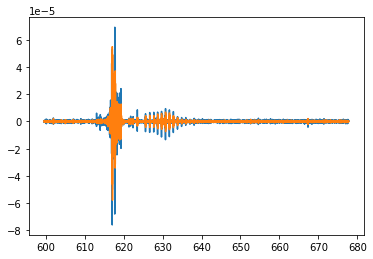

,epoch,EMG_epochEnergy,EMG_epochEnergy_norm,EMG_5Highest5Sec,EMG_5Highest5Sec_norm
0,20,1.397612e-07,2.936869,1.233448e-07,1.728040
1,21,2.995734e-09,0.062951,2.266161e-09,0.031749


In [32]:
sxDfInput = psgN3.data.loc[307000:347000, ["elapsed_seconds", "epoch", "SX1-SX2"]]
sxN3 = EMG(sxDfInput, signalType = "SX1-SX2")

seconds = sxN3.emgData["elapsed_seconds"]
SX = sxN3.emgData["filtered"]
plt.plot(seconds, sxN3.emgData["SX1-SX2"])
plt.plot(seconds, SX)
plt.show()

metricsSx = sxN3.getMetrics()
display(metricsSx)